In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt


# Write a program to segment the boat and the people on it from the background. Follow the instruction below:
Use 'boat.jpg' as input.

Apply Otsu thresholding.

Draw bounding box to identify the region where the boat and people are located


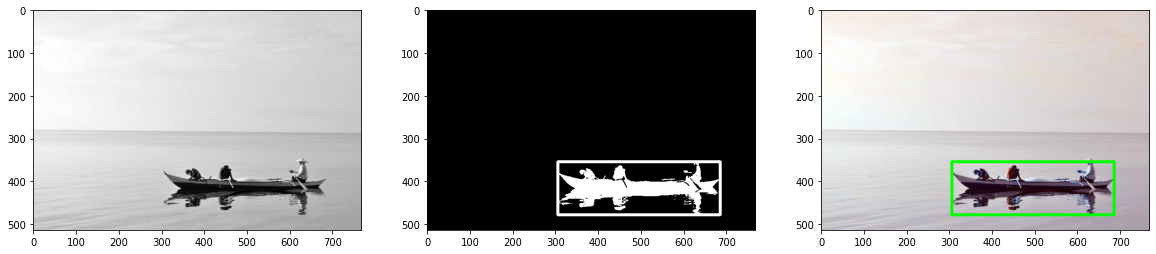

In [2]:
img = cv.imread('boat.jpg')
image = cv.cvtColor(img, cv.COLOR_BGR2GRAY )
img_copy = image.copy()

#otsu threholding 
ret, thresh = cv.threshold(img_copy,0,255,cv.THRESH_OTSU)
thresh = cv.bitwise_not(thresh)

# draw bounding box
x,y,w,h = cv.boundingRect(thresh)
cv.rectangle(thresh,(x,y),(x+w,y+h),(255,0,0),5)
cv.rectangle(img,(x,y),(x+w,y+h),(0,255,0),5)


plt.figure(figsize=(20,20))
plt.title('Boat and People')
plt.subplot(1,3,1)
plt.imshow(img_copy,'gray')
plt.subplot(1,3,2)
plt.imshow(thresh,'gray')
plt.subplot(1,3,3)
plt.imshow(img,'gray')
plt.show()


# Write a program to visualize the effect of size of structuring element on the morphological transformation (e.g. erosion, dilation, opening, and closing).

In [6]:
img = cv.imread('leaf.jfif')
img = cv.cvtColor(img, cv.COLOR_BGR2GRAY )
_, img_binary = cv.threshold(img, 0, 255, cv.THRESH_OTSU)

img = cv.resize(img,(15,15))



def trackbar(x):
    kernel = np.ones((x,x), np.uint8)
    global erosion
    erosion = cv.erode(img_binary, kernel, iterations = 1)
    img_result = np.hstack((img_binary,erosion, dilation, opening, closing))
    cv.imshow('Window',img_result)


def trackbar1(x):
    kernel = np.ones((x,x), np.uint8)
    global dilation
    dilation = cv.dilate(img_binary, kernel, iterations = 1)
    img_result = np.hstack((img_binary,erosion, dilation, opening, closing))
    cv.imshow('Window',img_result)


def trackbar2(x):
    kernel = np.ones((x,x), np.uint8)
    global opening
    opening = cv.morphologyEx(img_binary, cv.MORPH_OPEN, kernel)
    img_result = np.hstack((img_binary,erosion, dilation, opening, closing))
    cv.imshow('Window',img_result)

def trackbar3(x):
    kernel = np.ones((x,x), np.uint8)
    global closing
    closing = cv.morphologyEx(img_binary, cv.MORPH_CLOSE, kernel)
    img_result = np.hstack((img_binary,erosion, dilation, opening, closing))
    cv.imshow('Window',img_result)


cv.namedWindow('Window')
cv.createTrackbar('Erosion', 'Window', 1, 90, trackbar)
cv.createTrackbar('Dilation', 'Window', 1, 90, trackbar1)
cv.createTrackbar('Opening', 'Window', 1, 90, trackbar2)
cv.createTrackbar('Closing', 'Window', 1, 90, trackbar3)
cv.waitKey(0)
cv.destroyAllWindows()

# Apply the steps shown in exercise 4 to segment the porcelain from these images: "porcelain1.jfif" - "porcelain5.jfif".

In [4]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import colors
from matplotlib.colors import hsv_to_rgb

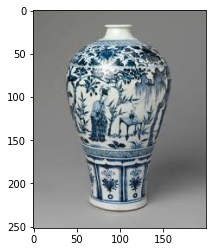

In [5]:
img = cv.imread('porcelain5.jfif')
img = cv.cvtColor(img,cv.COLOR_BGR2RGB)

plt.imshow(img)
plt.show()

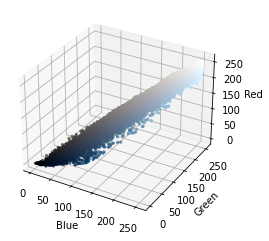

In [19]:
r, g, b = cv.split(img)
fig = plt.figure()
axis = fig.add_subplot(1, 1, 1, projection = "3d")

pixel_colors = img.reshape((img.shape[0]*img.shape[1], 3))
norm = colors.Normalize(vmin = -1., vmax=1.)
norm.autoscale(pixel_colors)
pixel_colors = norm(pixel_colors).tolist()

axis.scatter(b.flatten(), g.flatten(), r.flatten(), facecolors = pixel_colors,
            marker = ".")
axis.set_xlabel('Blue')
axis.set_ylabel('Green')
axis.set_zlabel('Red')
plt.show()

In [20]:
min(pixel_colors)

[0.0, 0.003921568859368563, 0.007843137718737125]

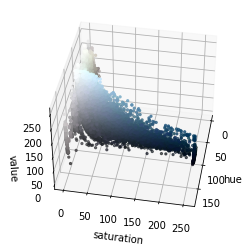

In [31]:
img_hsv = cv.cvtColor(img, cv.COLOR_RGB2HSV)

h, s, v = cv.split(img_hsv)
fig = plt.figure()
axis = fig.add_subplot(1, 1, 1, projection = "3d")


axis.scatter(h.flatten(), s.flatten(), v.flatten(), facecolor = pixel_colors,
            marker = ".")

axis.view_init(40, 10)
axis.set_xlabel("hue")
axis.set_ylabel("saturation")
axis.set_zlabel("value")
plt.show()

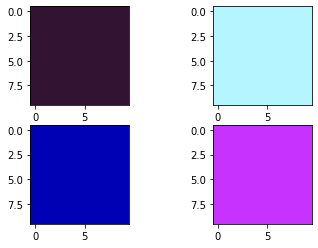

In [38]:
light_blue_value = (50, 20, 50)
dark_blue_value = (180, 245, 255)
light_white_value = (0, 0, 180)
dark_white_value = (200, 50, 255)

lo_square_blue = np.full((10, 10, 3), light_blue_value, dtype = np.uint8)/255.0
do_square_blue = np.full((10, 10, 3), dark_blue_value, dtype = np.uint8)/255.0
lo_square_white = np.full((10, 10, 3), light_white_value, dtype = np.uint8)/255.0
do_square_white = np.full((10, 10, 3), dark_white_value, dtype = np.uint8)/255.0

plt.subplot(2, 2, 1)
plt.imshow(lo_square_blue)
plt.subplot(2, 2, 2)
plt.imshow(do_square_blue)
plt.subplot(2, 2, 3)
plt.imshow(lo_square_white)
plt.subplot(2, 2, 4)
plt.imshow(do_square_white)
plt.show()

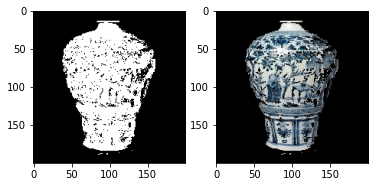

In [39]:
mask1 = cv.inRange(img_hsv, light_blue_value, dark_blue_value)
mask2 = cv.inRange(img_hsv, light_white_value, dark_white_value)


combine_mask = cv.bitwise_or(mask1, mask2)

res = cv.bitwise_and(img, img, mask = combine_mask)

plt.subplot(1, 2, 1)
plt.imshow(combine_mask, 'gray')
plt.subplot(1, 2, 2)
plt.imshow(res)
plt.show()

In [40]:
list = []

for i in range(1,6):
    img = cv.imread('porcelain'+str(i)+'.jfif')
    
    img = cv.cvtColor(img,cv.COLOR_BGR2RGB)
    
    img = cv.resize(img, (200,200), interpolation = cv.INTER_NEAREST)
    list.append(img)
    

mask1 = cv.inRange(img_hsv, light_blue_value, dark_blue_value)
mask2 = cv.inRange(img_hsv, light_white_value, dark_white_value)

# Combine the masks
combine_mask = cv.bitwise_or(mask1, mask2)
    
result = []

for i in range(0,5):
    img_hsv = cv.cvtColor(list[i], cv.COLOR_RGB2HSV)
    
    res = cv.bitwise_and(img_hsv, img_hsv, mask = combine_mask)
    hsv2rgb = cv.cvtColor(res,cv.COLOR_HSV2RGB)
    result.append(hsv2rgb)


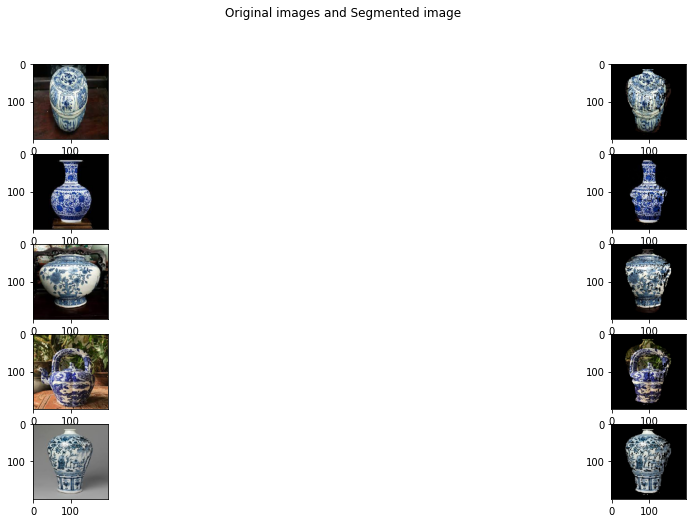

In [53]:
frame, axis = plt.subplots(5, 2, figsize = (19, 8))

for i in range(5):
    axis[i][0].imshow(list[i])
    axis[i][1].imshow(result[i])

frame.suptitle('Original images and Segmented image')
plt.show()